## Foreign Exchange Rates Prediction

This dataset was generated on the Federal Reserve's Download Data Program. Some changes were made in the dataset, such as header simplifications and inversions of base currency. For example, Fed provides Australian Dollar, Euro, New Zeland Dollar and United Kingdom Pound based in their units (not in dollar). So I made a convertion for this dataset in order to view all rates based in dollar units.

### Explanatory Data Analysis (EDA)

In [19]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Immporting the dataset
dataset = pd.read_csv('Foreign_Exchange_Rates.csv')
df = dataset.copy()

In [3]:
df.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [4]:
# Columns of the dataset
print(df.columns)

Index(['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')


In [6]:
# Removing the unnusual column name 'Unnamed:0' from the dataset
df = df.drop(columns=df.columns[0])
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [7]:
# Standardizing the existing column names to "CountryCurrency/USD"
new_col_names = ['Time Series', 'aud', 'eur', 'nzd', 'gbp', 'brl', 'cnd', 'cny', 'hkd', 'idr', 'krw', 'mxn', 'zar', 'sgd',
                 'dkk', 'jpy', 'myr', 'nok', 'sek', 'lkr', 'chf', 'twd', 'thb']

df.columns = new_col_names

# capitalizing the column names and appending '_USD' to each and every column except the first one
df.columns = map(str.upper, df.columns)
df.rename(columns = lambda x : x + '_USD', inplace=True)
df.rename(columns = {'TIME SERIES_USD' : 'Time Series'}, inplace=True)

In [8]:
df.head()

,Time Series,AUD_USD,EUR_USD,NZD_USD,GBP_USD,BRL_USD,CND_USD,CNY_USD,HKD_USD,IDR_USD,...,SGD_USD,DKK_USD,JPY_USD,MYR_USD,NOK_USD,SEK_USD,LKR_USD,CHF_USD,TWD_USD,THB_USD
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [9]:
# Replacing the 'ND' values with 'NaN'
df.replace(to_replace='ND', value=np.nan)

# Dropping all the NaN values at one go
df.dropna().reset_index(drop=True)

#Checking are there any NaN values are present or not
df.isna().sum()

Time Series    0
AUD_USD        0
EUR_USD        0
NZD_USD        0
GBP_USD        0
BRL_USD        0
CND_USD        0
CNY_USD        0
HKD_USD        0
IDR_USD        0
KRW_USD        0
MXN_USD        0
ZAR_USD        0
SGD_USD        0
DKK_USD        0
JPY_USD        0
MYR_USD        0
NOK_USD        0
SEK_USD        0
LKR_USD        0
CHF_USD        0
TWD_USD        0
THB_USD        0
dtype: int64

### Data Visualization

In [10]:
# data type of each column
df.dtypes

Time Series    object
AUD_USD        object
EUR_USD        object
NZD_USD        object
GBP_USD        object
BRL_USD        object
CND_USD        object
CNY_USD        object
HKD_USD        object
IDR_USD        object
KRW_USD        object
MXN_USD        object
ZAR_USD        object
SGD_USD        object
DKK_USD        object
JPY_USD        object
MYR_USD        object
NOK_USD        object
SEK_USD        object
LKR_USD        object
CHF_USD        object
TWD_USD        object
THB_USD        object
dtype: object

In [11]:
# converting the object data type to numeric type for each column
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce') # returns invalid value as NaN

In [12]:
# adding more 3 columns named as 'month', 'year', 'month_year'
df['Time Series'] = pd.to_datetime(df['Time Series'])
df['month'] = df['Time Series'].dt.month
df['year'] = df['Time Series'].dt.year
df['month_year'] = df['Time Series'].dt.to_period('M')

In [13]:
df.head()

,Time Series,AUD_USD,EUR_USD,NZD_USD,GBP_USD,BRL_USD,CND_USD,CNY_USD,HKD_USD,IDR_USD,...,MYR_USD,NOK_USD,SEK_USD,LKR_USD,CHF_USD,TWD_USD,THB_USD,month,year,month_year
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,1,2000,2000-01
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,1,2000,2000-01
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,1,2000,2000-01
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,1,2000,2000-01
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,1,2000,2000-01


In [14]:
df['AUD_USD'].count()

5019

That’s a huge number! So instead, we will take the average rate of each month, assuming the mean represents the entire month.

In [15]:
df_groupby_aud = df.groupby('month_year').AUD_USD.mean().reset_index()
df_groupby_aud

,month_year,AUD_USD
0,2000-01,1.524645
1,2000-02,1.593205
2,2000-03,1.641087
3,2000-04,1.677935
4,2000-05,1.729309
...,...,...
235,2019-08,1.476127
236,2019-09,1.467460
237,2019-10,1.471114
238,2019-11,1.464763


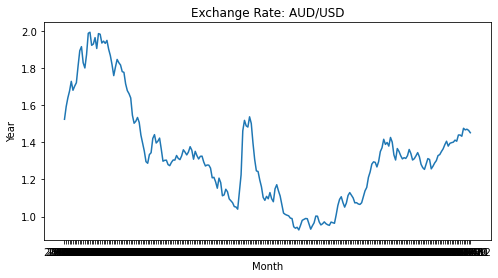

In [16]:
# to visualize the pattern of AUD/USD
x = df_groupby_aud['month_year'].astype(str)
y = df_groupby_aud['AUD_USD']

plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title("Exchange Rate: AUD/USD")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [17]:
# Creating a dataframe of average rate of each month of all the given countries
groupby_all = df.groupby('month_year').apply(lambda x : pd.Series
                                             ({'AUD_mean': x['AUD_USD'].mean(),
                                               'EUR_mean': x['EUR_USD'].mean(),
                                               'NZD_mean': x['NZD_USD'].mean(),
                                               'SGD_mean': x['SGD_USD'].mean(),
                                               'GBP_mean': x['GBP_USD'].mean(),
                                               'JPY_mean': x['JPY_USD'].mean(),
                                               'CHF_mean': x['CHF_USD'].mean()})).reset_index()

groupby_all = pd.DataFrame(groupby_all)

groupby_all['USD_mean'] = [1 for i in range(240)]
groupby_all.head()

,month_year,AUD_mean,EUR_mean,NZD_mean,SGD_mean,GBP_mean,JPY_mean,CHF_mean,USD_mean
0,2000-01,1.524645,0.987345,1.951050,1.675665,0.609620,105.296000,1.590260,1
1,2000-02,1.593205,1.017025,2.039655,1.702790,0.625020,109.388500,1.634770,1
2,2000-03,1.641087,1.037013,2.040430,1.715343,0.632948,106.307391,1.663617,1
3,2000-04,1.677935,1.058630,2.016400,1.709590,0.631990,105.627000,1.665650,1
4,2000-05,1.729309,1.104023,2.125468,1.728573,0.662927,108.320455,1.719009,1


__USD_mean__ is created and added a value of 1, to illustrate the difference of all exchange rates against the baseline visually.

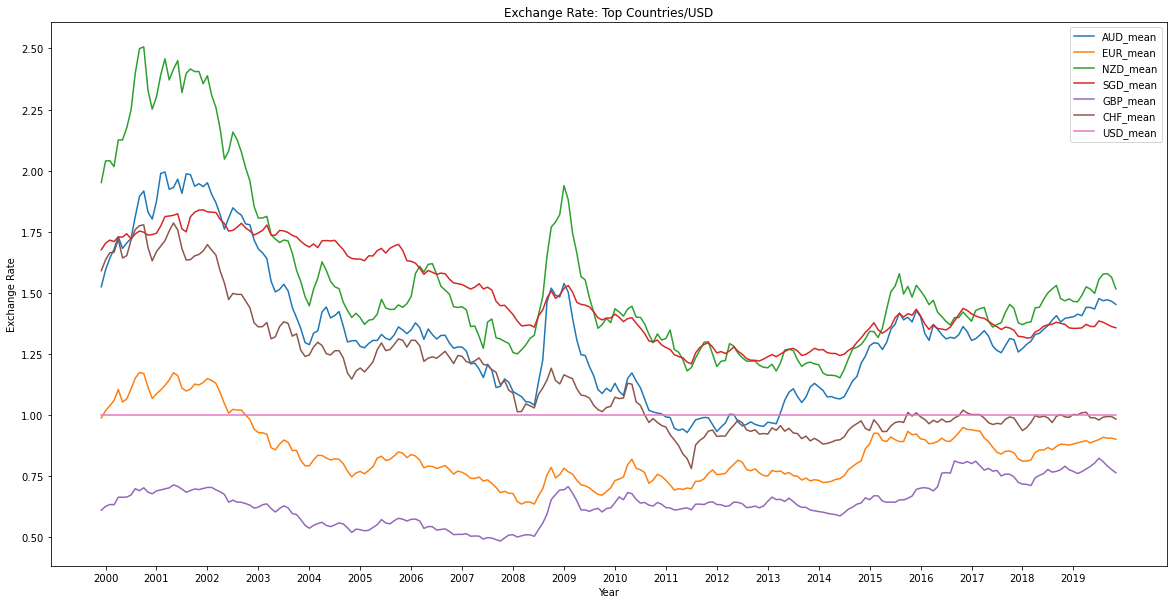

In [18]:
# to visualize all the countries pattern
y_all = groupby_all[['AUD_mean', 'EUR_mean', 'NZD_mean', 'SGD_mean', 'GBP_mean', 'CHF_mean', 'USD_mean']]
labels = ["AUD_mean", "EUR_mean", "NZD_mean", "SGD_mean", "GBP_mean", "CHF_mean", "USD_mean"]

x_ticks = list(range(1, 240, 12))
x_ticklabels = [x for x in range(2000, 2020)]

plt.figure(figsize=(20,10))
ax = plt.subplot()

plt.plot(x, y_all)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

plt.legend(labels)
plt.title("Exchange Rate: Top Countries/USD")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.show()

It is seen that the pattern of all exchange rates against USD baseline is pretty much the same. Such peak is seen between the year of 2008 and 2010, which can be explained by the Great Recession in 2008.